#TP1 Parte 2 A

##Imports y datasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from datetime import datetime
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id='10CSjcscRpZJa9Al2G07Tr3UpdoxM7Rzc'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_data.parquet')
meli_data = pd.read_parquet('train_data.parquet')

In [ ]:
id='1mtJARQUFJj-xcVxjdDyk_vJ75cVhcK6c'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('dengue_features_train.csv')
dengue_data = pd.read_csv('dengue_features_train.csv')

In [ ]:
id='1BDD0tlAqXE-h5uX9kxmH_CrjwQPp9jtX'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('traininig_set_features.csv')
flu_data = pd.read_csv('traininig_set_features.csv')

In [ ]:
soja_data = pd.read_csv("https://docs.google.com/spreadsheets/d/1FVeSNgfLC7SI4vwLE2MXv2lR20ltPQ6WhIo2WZ0J1oM/export?format=csv")

In [ ]:
id = '1bz-4EpaxowKlgNM8Kq3lfY3SfaOU7byK'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('spotify_dataset.csv')
spotify = pd.read_csv('spotify_dataset.csv')

##Bar Plot

Como la variable a predecir es la gente que esta mas dispuesta a recibir la vacuna, resulta conveniente ver a que grupos de edades un doctor le recomendo vacunarse, ya que los que recibieron el consejo tendran mayor tendencia a vacunarse

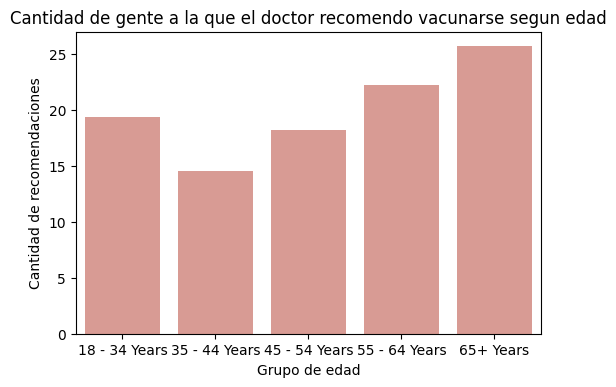

In [ ]:
plt.figure(dpi = 100)
prueba = flu_data.loc[:,['age_group', 'doctor_recc_h1n1']].groupby(['age_group']).agg({'doctor_recc_h1n1':'sum'})
barplot = sns.barplot(x=prueba.index, y = (prueba['doctor_recc_h1n1']/prueba['doctor_recc_h1n1'].sum())*100, data = prueba, color= 'salmon', saturation = .5)
barplot.set(xlabel='Grupo de edad', ylabel='Cantidad de recomendaciones', title = 'Cantidad de gente a la que el doctor recomendo vacunarse segun edad')

plt.show()

##HeatMap

Para este caso decidi evaluar como variaba la opinion en la efectividad de la vacuna con respecto a los estudios de cada persona para tratar de encontrar alguna tendencia

In [ ]:
opinion_h1n1_by_education = pd.pivot_table(data = flu_data, index = 'education', values = 'respondent_id', columns = 'opinion_h1n1_vacc_effective', aggfunc= 'count')
opinion_h1n1_by_education

opinion_h1n1_vacc_effective,1.0,2.0,3.0,4.0,5.0
education,,,,,
12 Years,222,432,1087,2629,1415
< 12 Years,123,184,490,876,680
College Graduate,229,628,1555,4512,3133
Some College,231,529,1270,3280,1709


In [ ]:
opinion_h1n1_by_education = opinion_h1n1_by_education.apply(lambda row: (row/row.sum())*100, axis=1).reindex(index=['< 12 Years', '12 Years', 'Some College', 'College Graduate'])
opinion_h1n1_by_education

opinion_h1n1_vacc_effective,1.0,2.0,3.0,4.0,5.0
education,,,,,
< 12 Years,5.227369,7.819805,20.824479,37.229069,28.899278
12 Years,3.837511,7.467589,18.789974,45.445117,24.459810
Some College,3.291067,7.536686,18.093746,46.730303,24.348198
College Graduate,2.277021,6.244407,15.461867,44.864274,31.152431


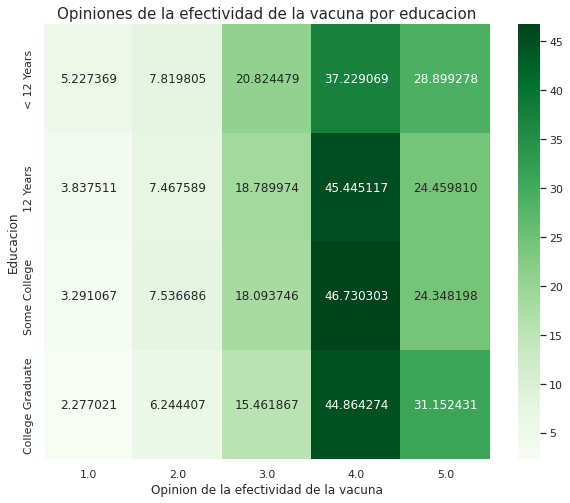

In [ ]:
sns.set({'figure.figsize':(10,8)})

g = sns.heatmap(opinion_h1n1_by_education, cmap="Greens", annot=True, fmt='f')
g.set_ylabel("Educacion") 
g.set_xlabel("Opinion de la efectividad de la vacuna")
g.set_title("Porcentaje de las opiniones de la efectividad de la vacuna por educacion", size=15)

plt.show()

##BoxPlot

En este caso vemos por cada ciudad la temperatura del aire en cada una y como va variando

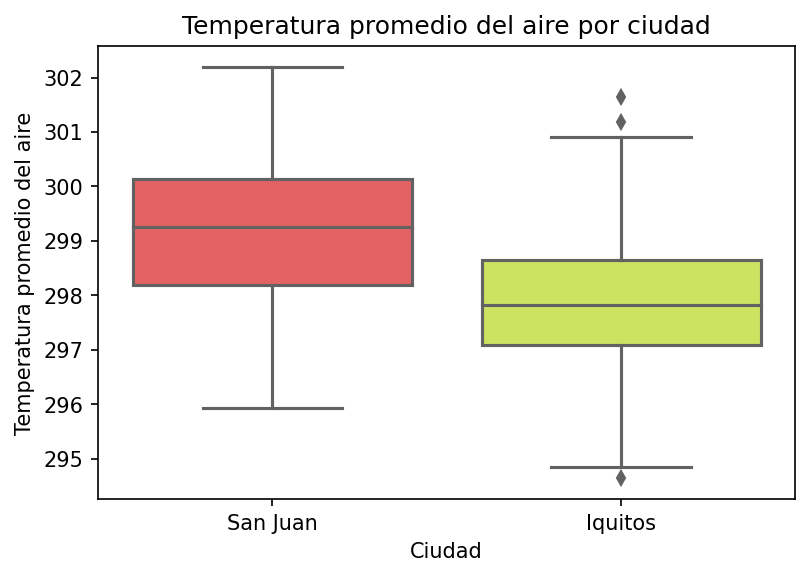

In [ ]:
dengue_data.loc[dengue_data['city']=='iq', ['city']] ='Iquitos'
dengue_data.loc[dengue_data['city']=='sj', ['city']] ='San Juan'
plt.figure(dpi=150)
plt.title("Temperatura promedio del aire por ciudad")
sns.boxplot(data=dengue_data, y='reanalysis_air_temp_k', x='city', palette=['#F84D4F', "#DAF84D"])
plt.ylabel('Temperatura promedio del aire')
plt.xlabel('Ciudad')
plt.show()

##Violin Plot

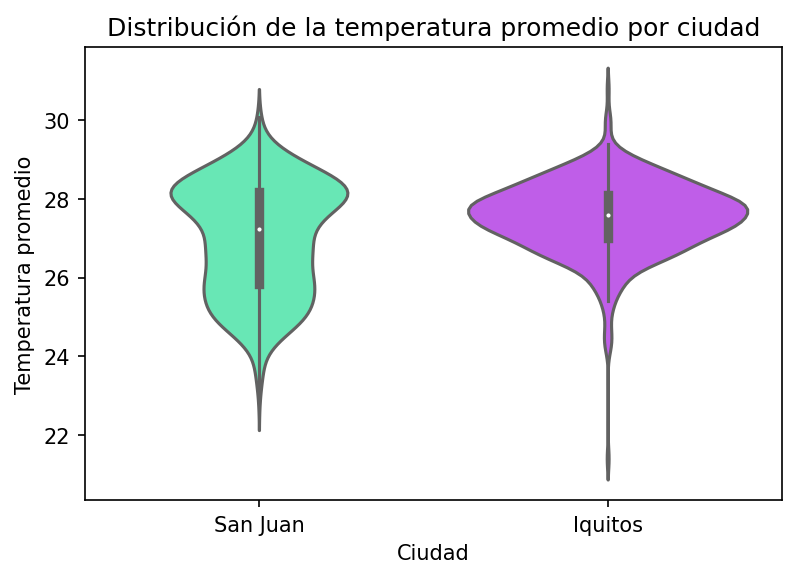

In [ ]:
plt.figure(dpi=150)
plt.title("Distribución de la temperatura promedio por ciudad")
sns.violinplot(
    data=dengue_data,
    y='station_avg_temp_c',
    x='city',
    palette=['#53FCB9', "#C847FF"]
)
plt.ylabel('Temperatura promedio')
plt.xlabel('Ciudad')
plt.show()

##Histograma

Para determinar el precio de cierre de la soja puede servir saber cuales fueron los valores mas frecuentes que se presentaron

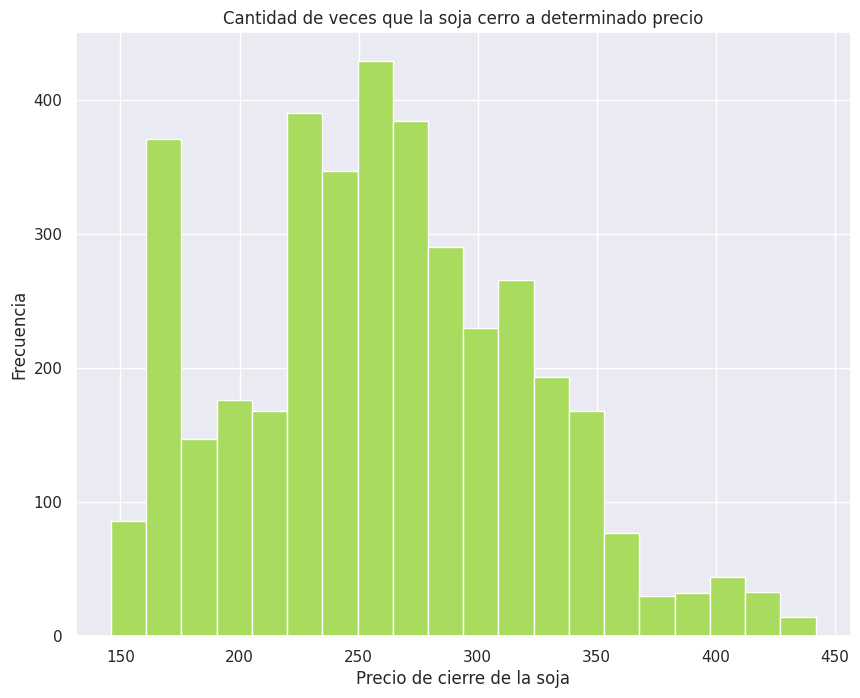

In [ ]:
plt.figure(dpi=100)
plt.hist(soja_data['Cierre'],bins=20, color = "#A8DB5E")

plt.title("Cantidad de veces que la soja cerro a determinado precio")
plt.xlabel("Precio de cierre de la soja")
plt.ylabel("Frecuencia")

plt.show()

##Bar Plot

Para no quedarse sin stock, puede servir ver un promedio de ventas por dia de semana para saber que dias de semana se precisa mas stock

<Figure size 960x720 with 0 Axes>

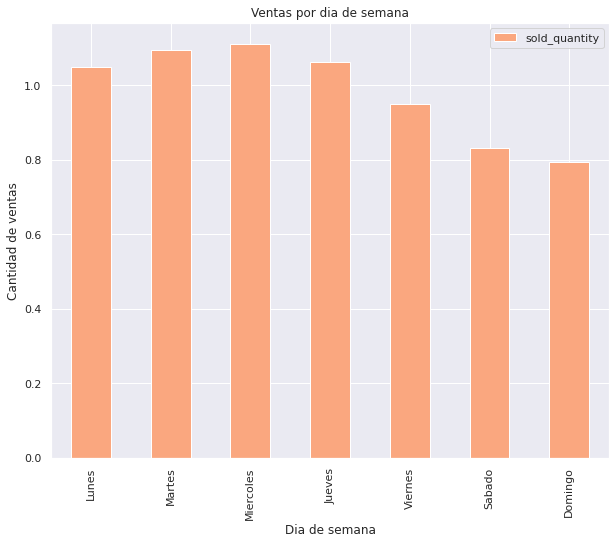

In [ ]:
meli_data['date'] = pd.to_datetime(meli_data['date'])
days = {0:"Lunes", 1:'Martes', 2:'Miercoles', 3:'Jueves', 4:'Viernes', 5:'Sabado', 6:'Domingo'}
meli_sold_by_weekday = (meli_data.loc[:, ['date', 'sold_quantity']].groupby((meli_data['date']).dt.weekday).mean()).rename(index=days)
plt.figure(figsize=(6.4, 4.8), dpi=150)
meli_sold_by_weekday.plot(kind='bar', color= {'#FAA77F'})
plt.xlabel("Dia de semana")
plt.ylabel("Cantidad de ventas")
plt.title("Ventas por dia de semana")
plt.show()

#TP1 Parte 2 B

Suponiendo que se quiera predecir cuales fueron las canciones de spotify que tuvieron exito durante la pandemia, podemos elegir las canciones mas populares y de ahi ver como se comportan sus distintos parametros, por ejemplo la energia, que es una medida de intensidad para la cancion que va del 0 al 1, las canciones mas energicas son las mas ruidosas y con tempos rapidos

Fuente: https://www.kaggle.com/sashankpillai/spotify-top-200-charts-20202021

Agarro las 10 canciones que fueron mas populares durante la pandemia y mido su energia

In [ ]:
spotify['Weeks Charted'] = spotify['Weeks Charted'].str[:10]
inicio_pandemia = pd.to_datetime('2020-03-9')
semana_en_top = pd.to_datetime(spotify['Weeks Charted'])
canciones_en_pandemia = semana_en_top > inicio_pandemia
dataset_en_pandemia = spotify[canciones_en_pandemia]


In [ ]:
mas_populares = dataset_en_pandemia.loc[pd.to_numeric(dataset_en_pandemia['Popularity'],errors ='coerce').nlargest(5).index,:]
mas_populares

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",2021-03-31,2021-07-23,97,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab


<Figure size 960x720 with 0 Axes>

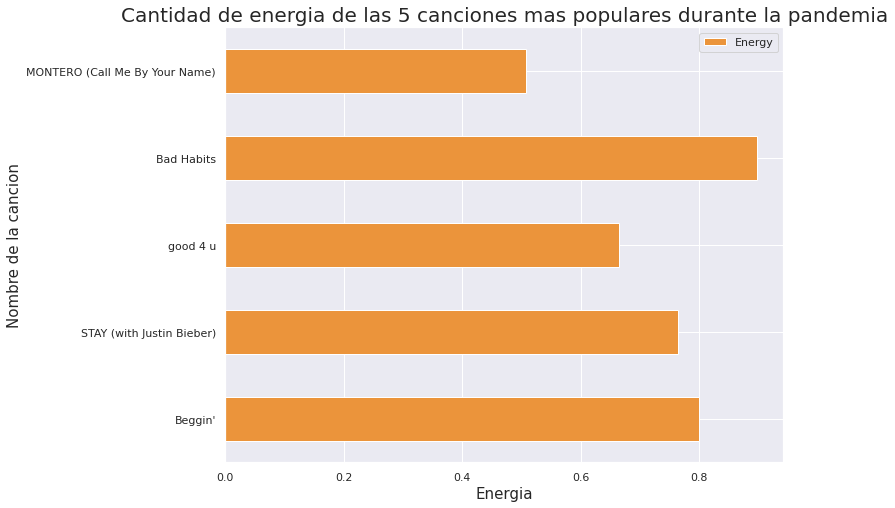

In [ ]:
plt.figure(figsize=(6.4, 4.8), dpi=150)
mas_populares['Energy'] = pd.to_numeric(mas_populares['Energy'])
mas_populares.loc[:, ['Song Name', 'Energy']].plot(kind='barh', color= {'#EB943B'}, x = 'Song Name')
plt.xlabel("Energia",size = 15)
plt.ylabel("Nombre de la cancion", size = 15)
plt.title("Cantidad de energia de las 5 canciones mas populares durante la pandemia", size = 20)
plt.show()

Para la visualizacion me base en el plot de arriba y lo que hice fue armar cada barra con el codigo de barra que nos proporciona spotify, asi al escanearlo nos manda directo a la cancion para poder escucharla

Una mejora a esta visualizacion podria ser una opcion para ocultar los codigos de barra de la cancion y que solo quede el codigo de la cancion que se quiere escanear.

<img src= "https://drive.google.com/uc?id=1l4aB1fdOvg2wMaVJ9nj9PCvX-BQatax7" width="90%">
